In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2 as cv
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input,decode_predictions
from keras import backend as K
from keras.layers import add, Conv2D,MaxPooling2D,UpSampling2D,Input,BatchNormalization, RepeatVector, Reshape
#from keras.layers.merge import concatenate
from keras.models import Model
#from keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.utils import set_random_seed
#from tensorflow import set_random_seed
#set_random_seed(2)
#np.random.seed(1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
print(os.listdir("/content/drive/MyDrive/our485"))

['low', 'high']


In [ ]:
InputPath="/content/drive/My Drive/our485/high"
InputPath_2="/content/drive/My Drive/our485/low"

In [ ]:
def PreProcessData(ImagePath):
    y_=[]
    count=0
    for imageDir in os.listdir(ImagePath):
        if count<482:
            try:
                count=count+1
                img_high = cv.imread(ImagePath + imageDir)
                img_high = cv.cvtColor(img_high, cv.COLOR_BGR2RGB)
                img_y = cv.resize(img_high,(500,500))
                y_.append(img_y)
            except:
                pass
    y_ = np.array(y_)

    return y_


In [ ]:
def PreProcessData_low(ImagePath_low):
    X_=[]
    count=0
    for imageDir_low in os.listdir(ImagePath_low):
        if count<2131:
            try:
                count=count+1
                img_low =cv.imread(ImagePath_low + imageDir_low)
                img_low = cv.cvtColor(img_low, cv.COLOR_BGR2RGB)
                img_x = cv.resize(img_low,(500,500))
                X_.append(img_x)
            except:
                pass
    X_ = np.array(X_)

    return X_

In [ ]:
X_ = PreProcessData_low(InputPath_2)

In [ ]:
y_ = PreProcessData(InputPath)

In [ ]:
K.clear_session()
def InstantiateModel(in_):

    model_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(in_)
    model_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_1)
    model_1 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_1)

    model_2 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(in_)
    model_2 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_2)

    model_2_0 = Conv2D(64,(2,2), activation='relu',padding='same',strides=1)(model_2)

    model_add = add([model_1,model_2,model_2_0])

    model_3 = Conv2D(64,(3,3), activation='relu',padding='same',strides=1)(model_add)
    model_3 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_3)
    model_3 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3)

    model_3_1 = Conv2D(32,(3,3), activation='relu',padding='same',strides=1)(model_add)
    model_3_1 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_3_1)

    model_3_2 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_add)

    model_add_2 = add([model_3_1,model_3_2,model_3])

    model_4 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_2)
    model_4_1 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add)
    model_add_3 = add([model_4_1,model_add_2,model_4])

    model_5 = Conv2D(16,(3,3), activation='relu',padding='same',strides=1)(model_add_3)
    model_5 = Conv2D(16,(2,2), activation='relu',padding='same',strides=1)(model_add_3)

    model_5 = Conv2D(3,(3,3), activation='relu',padding='same',strides=1)(model_5)

    return model_5

In [ ]:
Input_Sample = Input(shape=(500, 500,3))
Output_ = InstantiateModel(Input_Sample)
Model_Enhancer = Model(inputs=Input_Sample, outputs=Output_)
Model_Enhancer.compile(optimizer="adam", loss='mean_squared_error')

In [ ]:
Model_Enhancer.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 500, 500, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 500, 500, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_3 (Conv2D)              (None, 500, 500, 32  896         ['input_1[0][0]']                
                                )                                                             

In [ ]:
def GenerateInputs(X,y):
    for i in range(len(X)):
        X_input = X[i].reshape(1,500,500,3)
        y_input = y[i].reshape(1,500,500,3)
        yield (X_input,y_input)
Model_Enhancer.fit_generator(GenerateInputs(X_,y_),epochs=32,verbose=1,steps_per_epoch=15,shuffle=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


StopIteration: ignored

In [ ]:
TestPath="../our485/eval15/high/"
TestPath_2="..//our485/eval15/low/"

In [ ]:
def ExtractTestInput(ImagePath):
    img = cv.imread(ImagePath)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = cv.resize(img,(500,500))
    img = img.reshape(1,500,500,3)
    return img

In [ ]:
ImagePath=TestPath +"111.png"
image_for_test = ExtractTestInput(ImagePath)
Prediction = Model_Enhancer.predict(image_for_test)

1/1 [==============================] - 0s 351ms/step


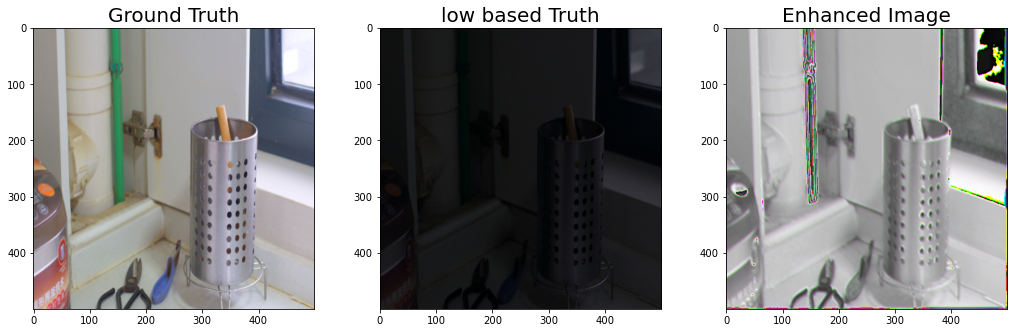

In [ ]:
Image_test=TestPath +"111.png"
plt.figure(figsize=(30,30))
plt.subplot(5,5,1)
img_1 = cv.imread(Image_test)
img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_1 = cv.resize(img_1, (500, 500))
plt.title("Ground Truth",fontsize=20)
plt.imshow(img_1)

plt.subplot(5,5,1+1)
Image_test=TestPath_2+"111.png"
#plt.figure(figsize=(30,30))
img_1 = cv.imread(Image_test)
img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_1 = cv.resize(img_1, (500, 500))
plt.title("low based Truth",fontsize=20)
plt.imshow(img_1)

plt.subplot(5,5,1+2)
img_1[:,:,:] = Prediction[:,:,:]
plt.title("Enhanced Image",fontsize=20)
plt.imshow(img_1)

Enter the name of folder:C:/Users/uie77819/Downloads/our485/eval15/high/


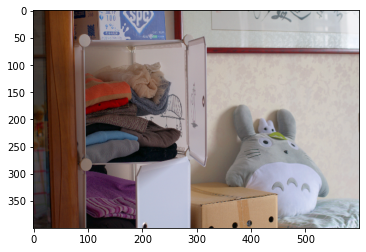

In [ ]:
filepath=input('Enter the name of folder:')
#image_name=input('enter the name of image:')
img = cv.imread(filepath+"22.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)